<a href="https://colab.research.google.com/github/mishraraaj/-Bike-Sharing-Demand-Prediction/blob/main/raaj_mishra_Team_2_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
working_dir='/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 2/'
df=pd.read_csv(working_dir+'Copy of SeoulBikeData.csv', encoding="cp1252")

In [ ]:
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


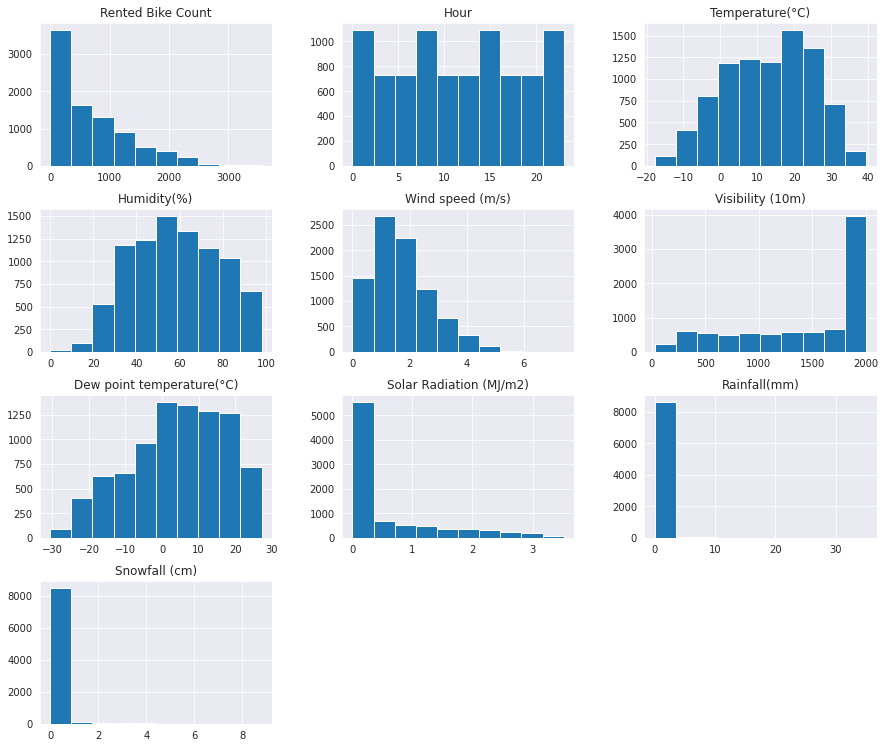

In [ ]:
df.hist(figsize=(15,30),layout=(9,3))
plt.show()

TREND FOR DEPENDENT VARIABLE

In [ ]:
df=df[df['Functioning Day']=='Yes']

In [ ]:
df=df.drop(columns=['Functioning Day'])

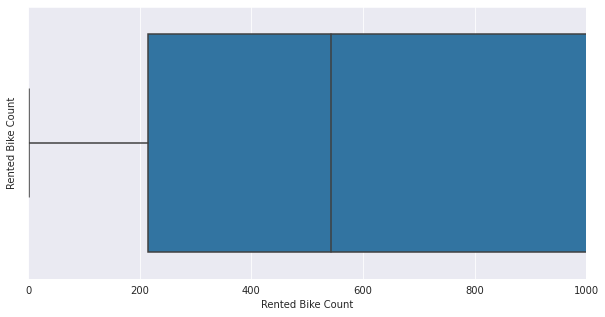

In [ ]:

plt.figure(figsize=(10,5))
plt.xlim(0,1000)
plt.ylabel('Rented Bike Count')
sns.boxplot(x=df['Rented Bike Count'])
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


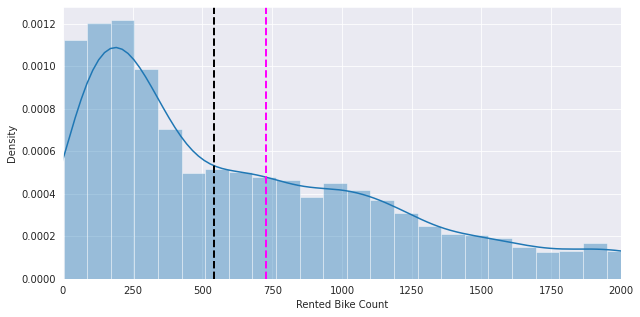

In [ ]:
plt.figure(figsize=(10,5))
plt.xlim(0,2000)
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')
ax=sns.distplot(df['Rented Bike Count'],hist=True)
ax.axvline(np.mean(df['Rented Bike Count']), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(df['Rented Bike Count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

In [ ]:
def round_int(x):
    if x in [float("-inf"),float("inf")]: return float("nan")
    return int(round(x))


In [ ]:
np.sqrt(df['Rented Bike Count']).value_counts()

11.045361    19
16.186414    19
14.933185    19
13.747727    18
10.148892    18
             ..
51.351728     1
37.148351     1
41.581246     1
39.837169     1
48.280431     1
Name: Rented Bike Count, Length: 2165, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


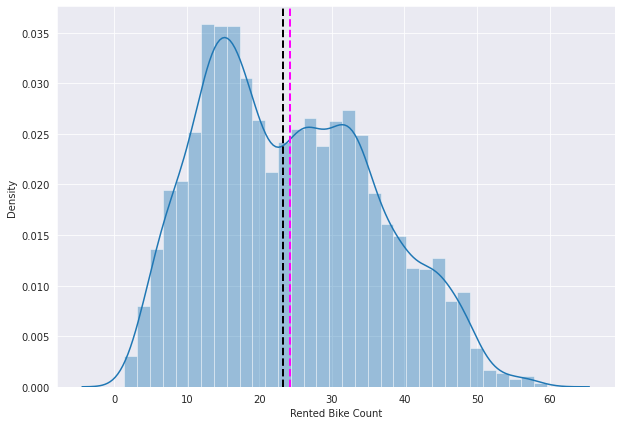

In [ ]:
plt.figure(figsize=(10,7))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(df['Rented Bike Count']))
ax.axvline(np.mean(np.sqrt(df['Rented Bike Count'])), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(df['Rented Bike Count']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


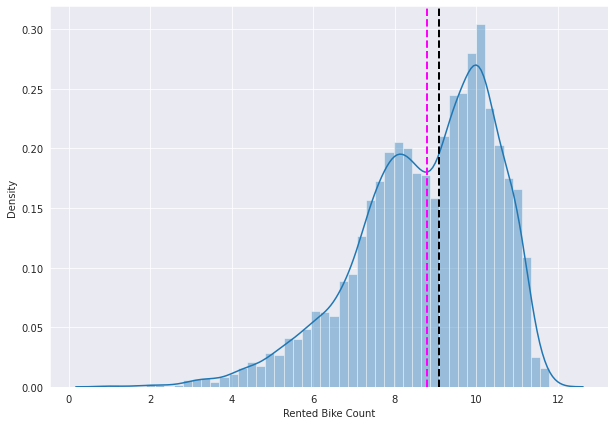

In [137]:
plt.figure(figsize=(10,7))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.log2(df['Rented Bike Count']))
ax.axvline(np.mean(np.log2(df['Rented Bike Count'])), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.log2(df['Rented Bike Count']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

So we should Take Square root of Y to make it normally distributed

## **categorical_variables**

In [ ]:
categorical_variables=list(set(df.columns)-set(df.describe().columns))   #categorical_variables

In [ ]:
categorical_variables

['Holiday', 'Seasons', 'Date']

In [ ]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()

In [ ]:
df[categorical_variables[:-1]]=df[categorical_variables[:-1]].apply(lambda X: encode.fit_transform(X))

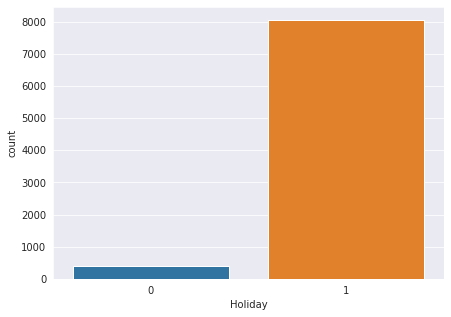

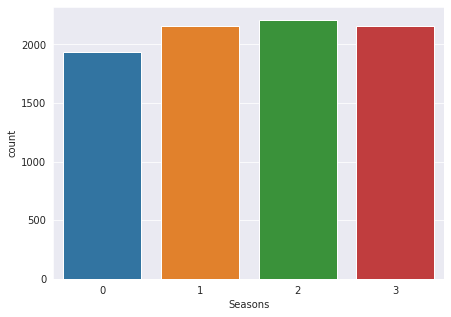

In [ ]:
for column in categorical_variables:
  if df[column].nunique() < 14:
    plt.figure(figsize=(7,5)) 
    sns.countplot(x=column,data=df[categorical_variables])
    #plt.legend()
    plt.show()

In [ ]:
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8465 non-null   datetime64[ns]
 1   Rented Bike Count          8465 non-null   int64         
 2   Hour                       8465 non-null   int64         
 3   Temperature(°C)            8465 non-null   float64       
 4   Humidity(%)                8465 non-null   int64         
 5   Wind speed (m/s)           8465 non-null   float64       
 6   Visibility (10m)           8465 non-null   int64         
 7   Dew point temperature(°C)  8465 non-null   float64       
 8   Solar Radiation (MJ/m2)    8465 non-null   float64       
 9   Rainfall(mm)               8465 non-null   float64       
 10  Snowfall (cm)              8465 non-null   float64       
 11  Seasons                    8465 non-null   int64         
 12  Holida

## Correlation Trend

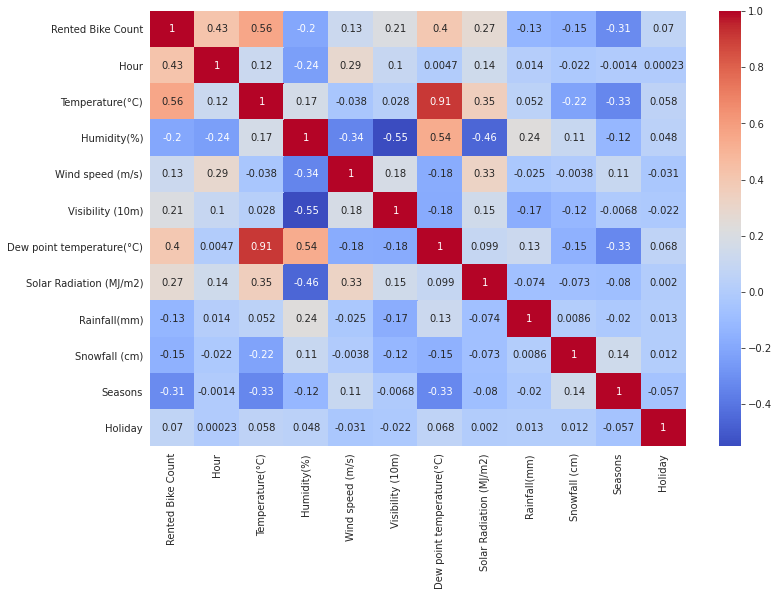

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(df.drop(columns=['Date','Rented Bike Count']))

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,variables,VIF
0,Hour,4.418146
1,Temperature(°C),41.031845
2,Humidity(%),15.178020
3,Wind speed (m/s),4.856375
4,Visibility (10m),9.123093
5,Dew point temperature(°C),23.327535
6,Solar Radiation (MJ/m2),2.864821
7,Rainfall(mm),1.083518
8,Snowfall (cm),1.129566
9,Seasons,3.316340


Ther Is Highly Multicollinear_features which need to be maniupulated

In [132]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))

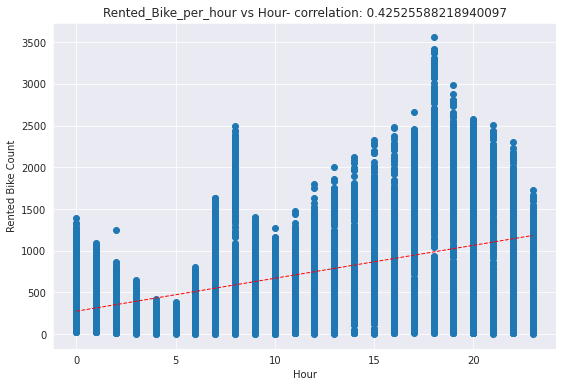

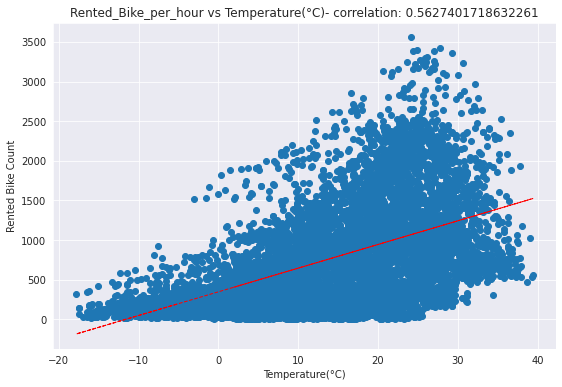

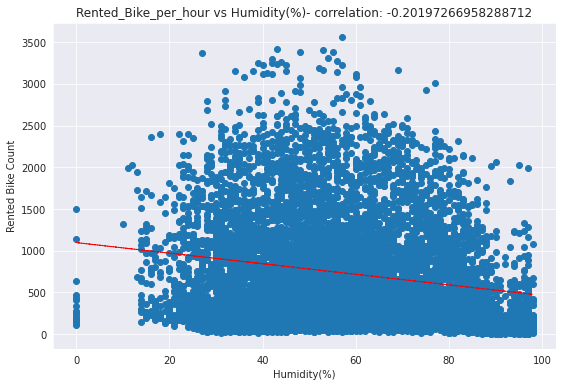

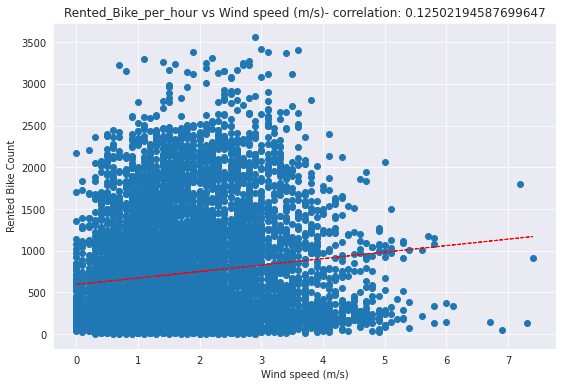

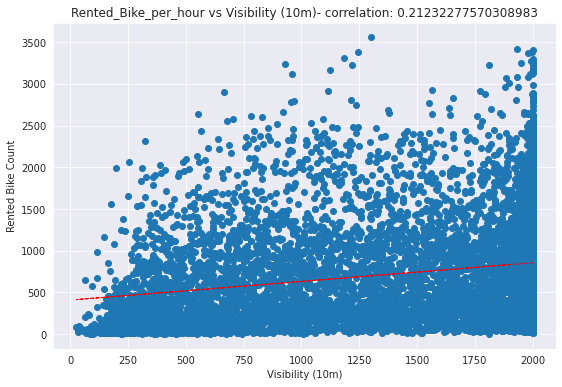

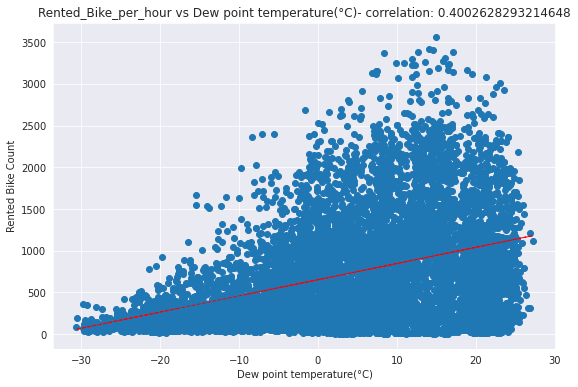

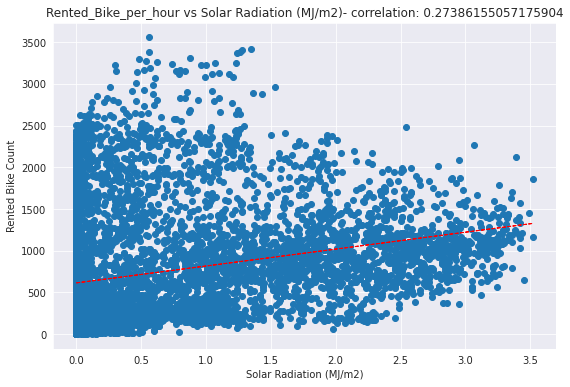

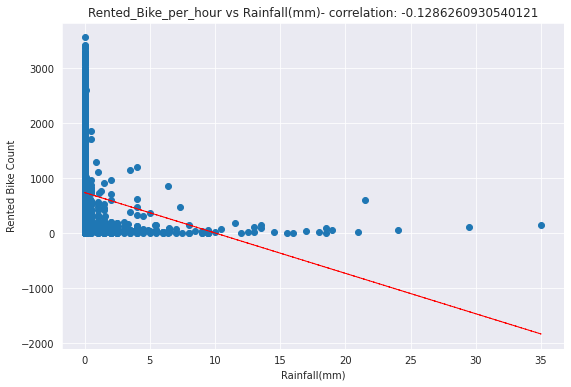

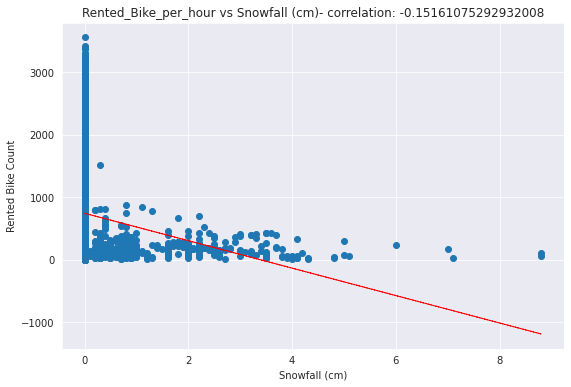

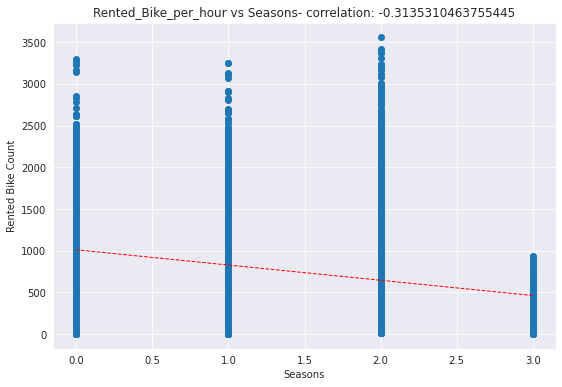

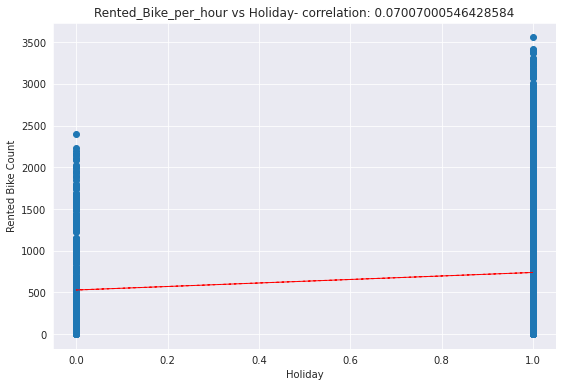

In [134]:
sns.set_style('darkgrid')
for col in numerical_columns:
    if col !=independent_variable:
        fig = plt.figure(figsize=(9, 6))
        ax = fig.gca()
        feature = dataset[col]
        label = dataset[independent_variable]
        correlation = feature.corr(label)
        plt.scatter(x=feature, y=label)
        plt.xlabel(col)
        plt.ylabel(independent_variable)
        ax.set_title('Rented_Bike_per_hour vs ' + col + '- correlation: ' + str(correlation))
        z = np.polyfit(dataset[col], dataset[independent_variable], 1)
        y_hat = np.poly1d(z)(dataset[col])

        plt.plot(dataset[col], y_hat, "r--", lw=1)

plt.show()